<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KMeans_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
def distance(x1, x2):
    return sum((x1-x2)**2)**(1/2)

In [10]:
import numpy as np
na1 = np.array([1, 2])
na2 = np.array([5, 5])
print(distance(na1, na2))

5.0


KMeans

In [11]:
def kmeans(data,k=3):
  centers=[]
  dl = len(data)
  #초기에 3개의 중심점을 선택한다. (무엇을 중심점으로 선택하는 것이 좋을지는 생략)
  for center in range(k):
    ci = np.random.randint(dl) #현재 있는 데이터 중에 무엇을 선택할 것인지 인덱스 결정 (ci는 선택 인덱스)
    centers.append(data[ci]) #선택한 점을 초기 중심점으로 결정
    # print(data[ci])
  #print(centers) 체크


  while True: #반복 작업
  
    #모든 데이터를 중심점과의 거리를 계산하여 가까운 중심점 그룹에 속하게 한다.
    cs = {} #키:그룹명, 값: 그 그룹에 속하는 점
    for elem in data: #모든 점들을
      distances = [] #중심점으로부터의 거리 구하기
      for i in range(k): #모든 중심점들과 비교
        dis = distance(centers[i], elem) #i번째 중심점과 elem 사이의 거리를 계산
        distances.append(dis)
      nd = np.array(distances)
      ai = nd.argmin() #최소 거리에 해당하는 인덱스 하나 구하기(그룹 인덱스) -> 가까운 점 하나가 선택됨
      #print(distance)
      #print(ai) 체크

      #가장 가까운 그룹에 선택된 점이 들어가도록 해야함
      if ai in cs: # 해당 인덱스가 처음 선택한 인덱스일 때
        cs[ai].append(elem) # 해당 그룹에 elem(점)을 소속시킨다. 
      else: # 아닌 경우
        cs[ai] = []  # 사전 개체에 그룹 빈 리스트 생성
        cs[ai].append(elem) #리스트에 elem을 소속시킨다
    #print(cs[0]) 체크
    #print(cs[1]) 체크
    #print(cs[2]) 체크
    #print(np.array(cs[0]).mena())

    # 그룹의 중심점을 새로이 계산
    rcenters = [] #새롭게 그룹핑한 그룹의 중심점이 들어갈 배열
    for i in range(k): #k개의 그룹에 관하여
      sx = np.array([x for x,_ in cs[i]])
      sy = np.array([y for _,y in cs[i]])
      rcenters.append([sx.mean(), sy.mean()])
    if np.array_equal(centers, rcenters): # 만약 이전 중심점과 새로운 중심점이 서로 같으면
      break #루프 탈출(바뀌지 않음)
    else:
      centers = rcenters #다르면, 바꿈
  return cs

In [12]:
data = np.array([[np.random.randint(0, 100), np.random.randint(0, 100)] for _ in range(50)])
len(data)

50

In [13]:
re_cl = kmeans(data)

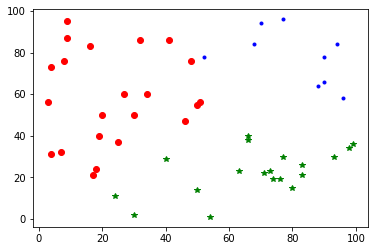

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.array([x for x,_ in re_cl[0]]), np.array([y for _,y in re_cl[0]]),'b.')
plt.plot(np.array([x for x,_ in re_cl[1]]), np.array([y for _,y in re_cl[1]]),'ro')
plt.plot(np.array([x for x,_ in re_cl[2]]), np.array([y for _,y in re_cl[2]]),'g*')
plt.show()